In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#global variables
minDepth = 0
step = 10

In [3]:
#change mindepth for lower bound of grid
def setMinDepth(value):
    global minDepth
    
    minDepth = value

In [4]:
def intersectionEdges(edge1,edge2):
    k1 = (edge1[0][1] - edge1[1][1])/(edge1[0][0] - edge1[1][0])
    b1 = edge1[0][1] - k1 * edge1[0][0]
    k2 = (edge2[0][1] - edge2[1][1])/(edge2[0][0] - edge2[1][0])
    b2 = edge2[0][1] - k2 * edge2[0][0]
    if (edge2[0][1] - edge2[0][0] * k1 - b1)*(edge2[1][1] - edge2[1][0] * k1 - b1) <= 0 and (edge1[0][1] - edge1[0][0] * k2 - b2)*(edge1[1][1] - edge1[1][0] * k2 - b2) <= 0:
        return True
    return False

In [12]:
#generate random input curve(landscape)
def generateInput(length):
    x = np.linspace(0,(length-1)*10,length)
    y = np.random.randint(10,size = length)
    curve = np.stack((x,y),axis = -1)
    return curve

In [6]:
#shows input curve
def drawCurve(curve):
    plt.plot(curve[:,0],curve[:,1],'b')
    plt.plot(curve[:,0],curve[:,1],'ro')

In [7]:
#vertical lines for grid
def drawVerticalLines(curve):
    for x,y in curve:
        plt.plot([x,x],[y,minDepth],'r')

In [8]:
def addSupportPoints(curve):
    for yel in curve[:,1]:
        k = []
        for i in range(0,curve.shape[0]):
            if curve[i][1] == yel:
                k = np.append(k,i)
        for ind in k:
            l = int(ind)
            r = int(ind)
            while l>=0 and curve[l][1]>=yel:
                l-=1
            if ind - l>1 and l>=0:
                dx = (curve[l+1][0] - curve[l][0])*(curve[l+1][1]-yel)/(curve[l+1][1]-curve[l][1])
                newx = curve[l+1][0] - dx
                curve = np.insert(curve,l+1,[newx,yel],axis = 0)
            while r<curve.shape[0] and curve[r][1]>=yel:
                r+=1
            if r - ind >1 and r<curve.shape[0]:
                dx = (curve[r][0] - curve[r-1][0])*(curve[r-1][1]-yel)/(curve[r-1][1]-curve[r][1])
                newx = curve[r-1][0] + dx
                curve = np.insert(curve,r,[newx,yel],axis = 0)
    return curve
                
def addSupportPointsWholeCurve(curve):
    for i in range(1,curve.shape[0]):
        if (curve[i][1]-yel)*(curve[i-1][1]-yel) < 0:
            dx = (curve[i][0] - curve[i-1][0])*abs(curve[i-1][1]-yel)/abs(curve[i][1]-curve[i-1][1])
            newx = curve[i-1][0] + dx
            curve = np.insert(curve,i,[newx,yel],axis = 0)
    return curve

In [9]:
def drawHorizontalLines(curve):
    global minDepth
    
    y = np.array(curve[:,1],copy=True)
    y.sort()
    miny = y[0]
    maxy = y[y.shape[0]-1]
    minx = min(curve[:,0])
    maxx = max(curve[:,0])
    for yel in y:
        pointsOnLine = [[0,yel]]
        for i in range(0,curve.shape[0]):
            if curve[i][1] == yel:
                pointsOnLine = np.append(pointsOnLine,[[i,yel]],axis = 0)
        if pointsOnLine[-1][0] != curve.shape[0]-1:
            pointsOnLine = np.append(pointsOnLine,[[curve.shape[0]-1,yel]],axis = 0)
        for i in range(1,pointsOnLine.shape[0]):
            i1 = int(pointsOnLine[i-1][0])
            i2 = int(pointsOnLine[i][0])
            curry = pointsOnLine[i][1]
            if curve[i1+1][1] >= pointsOnLine[i][1] and curve[i2-1][1] >= pointsOnLine[i][1]:
                    plt.plot([curve[i1][0],curve[i2][0]],[curry,curry],'g')
    if (miny - minDepth)%step != 0:
        minDepth -= (miny - minDepth)%step
    miny-=step
    while miny>=minDepth:
        plt.plot([minx,maxx],[miny,miny],'g')
        miny-=step

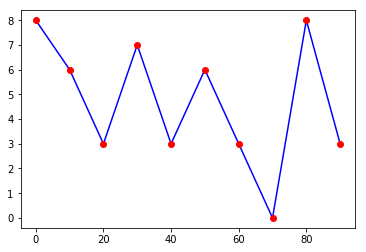

In [13]:
curve = generateInput(10)
drawCurve(curve)
plt.show()

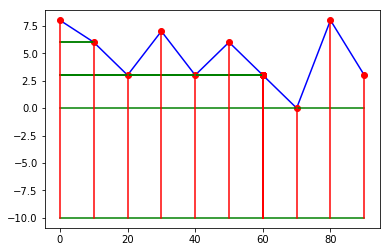

In [14]:
setMinDepth(-5)
newcurve = addSupportPoints(curve)
#curve = addSupportPointsWholeCurve(curve)
drawCurve(newcurve)
drawHorizontalLines(newcurve)
drawVerticalLines(newcurve)

In [64]:
intersectionEdges([[0,0],[2,2]],[[1.0000000000001,0.999999999999],[2,0]])

False